<a href="https://colab.research.google.com/github/Raafat-Nagy/Deep-Learning-Projects/blob/main/AutoEncoder/Convolution_AutoEncoder_For_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolution AutoEncoder For MNIST Using TensorFlow



In [30]:
import tensorflow as tf

print(tf.__version__)

2.18.0


## Load & Preprocess Data

In [49]:
from tensorflow.keras.datasets import mnist

# Load MNIST data (ignore the labels)
(x_train, _), (x_test, _) = mnist.load_data()
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [50]:
# Normalize
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [51]:
# Reshape the data to have a single channel (grayscale)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

##  Visualize Sample Images

In [52]:
import matplotlib.pyplot as plt

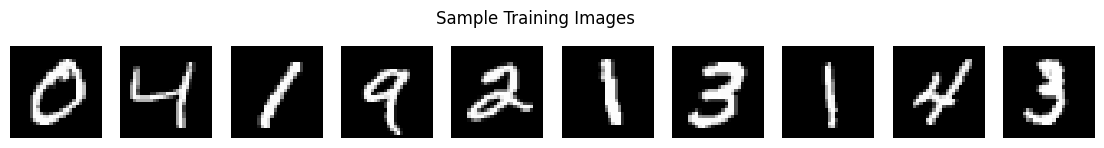

In [57]:
n = 10
plt.figure(figsize=(14, 3))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_train[i], cmap="gray")
    plt.axis("off")
plt.suptitle("Sample Training Images")
plt.show()

## Build the Convolutional Autoencoder

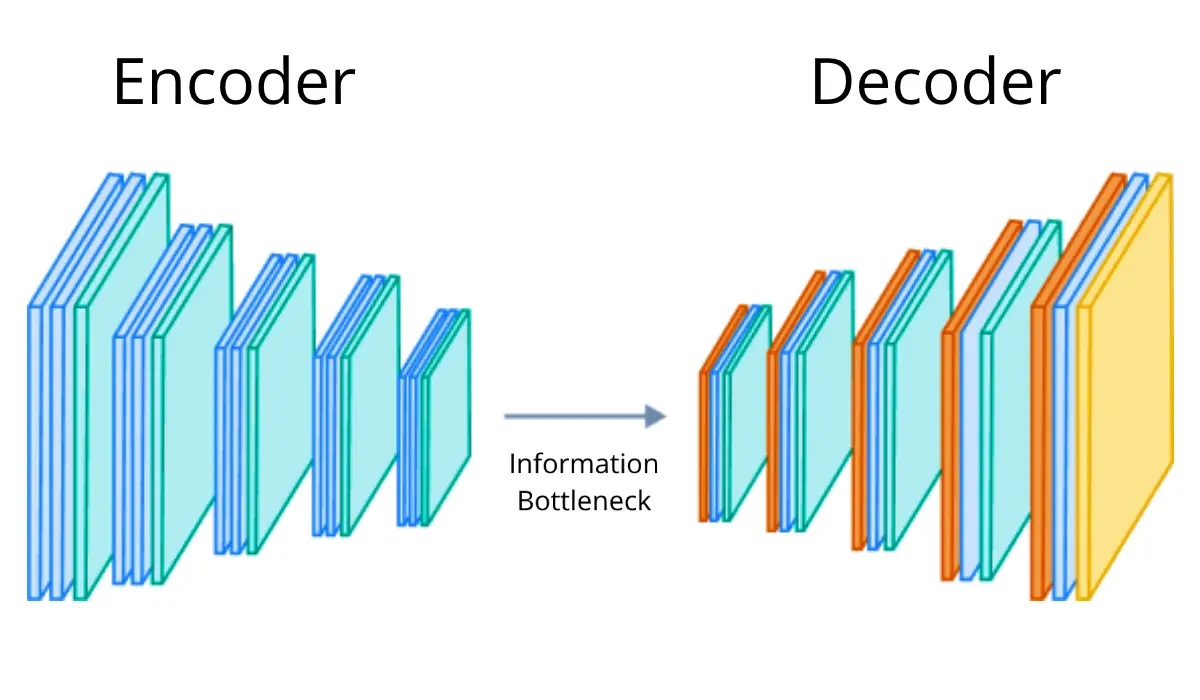

In [37]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

input_img = Input(shape=(28, 28, 1), name="Input")

# Encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same', name="Bottleneck")(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same', name="Output")(x)

In [38]:
# Autoencoder Model
autoencoder = Model(input_img, decoded, name="ConvAutoEncoder")
autoencoder.summary()

Model: "ConvAutoEncoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Bottleneck (MaxPooling2D)       │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 7, 7, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_4 (UpSampling2D)  │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_5 (UpSampling2D)  │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Conv2D)                 │ (None, 28, 28, 1)      │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,217 (12.57 KB)

 Trainable params: 3,217 (12.57 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the Convolutional Autoencoder Model

In [39]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

## Train the Convolutional Autoencoder

In [40]:
# Note we use x_train as both input and target
history  = autoencoder.fit(
    x_train,
    x_train,
    epochs=15,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
    )

Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.3840 - val_loss: 0.1089
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1041 - val_loss: 0.0928
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0924 - val_loss: 0.0871
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0871 - val_loss: 0.0830
Epoch 5/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0834 - val_loss: 0.0810
Epoch 6/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0814 - val_loss: 0.0795
Epoch 7/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0799 - val_loss: 0.0783
Epoch 8/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0789 - val_loss: 0.0773
Epoch 9/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0779 - val_loss: 0.0765
Epoch 10/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0771 - val_loss: 0.0759
Epoch 11/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0764 - val_loss: 0.0756
Epoch 12/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/ste

## Plot Training and Validation Loss

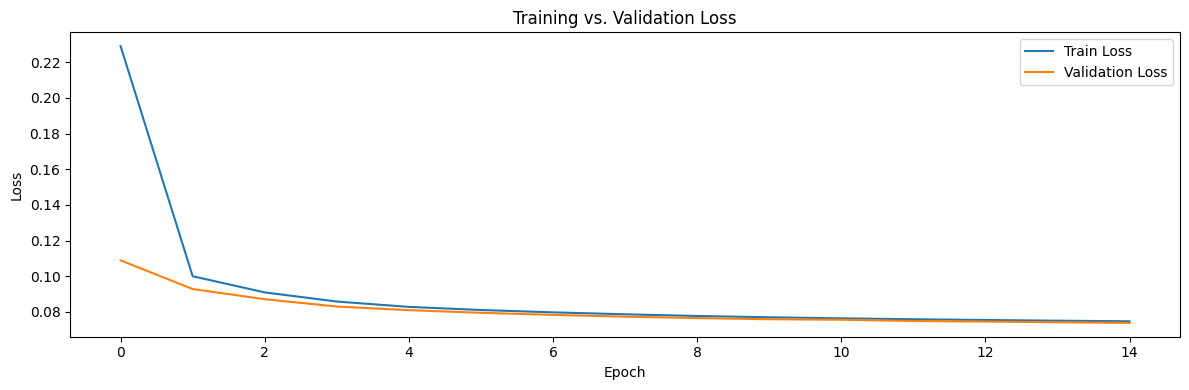

In [45]:
plt.figure(figsize=(12, 4))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs. Validation Loss")
plt.tight_layout()
plt.show()

## Predict (Reconstruct) Test Images

In [42]:
decoded_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


## Visualize Original vs. Reconstructed Images


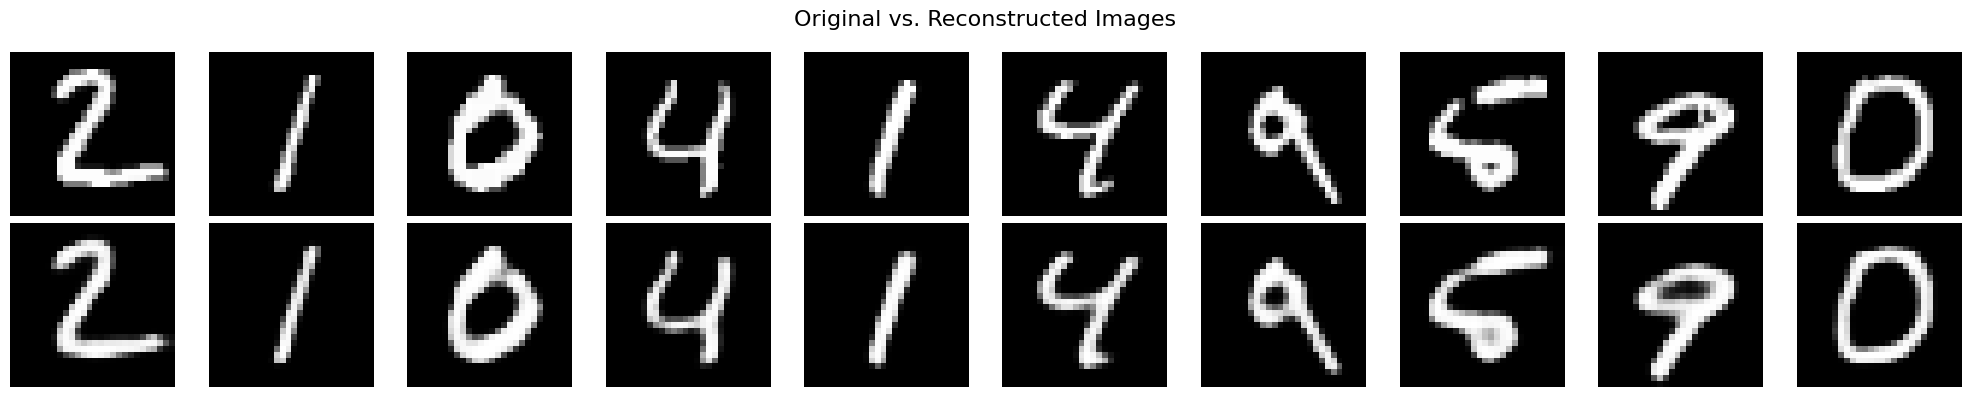

In [48]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.axis("off")

    # Reconstructed
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.axis("off")

plt.suptitle("Original vs. Reconstructed Images", fontsize=16)
plt.tight_layout()
plt.show()

---